## Car Review Rating Prediction

Given *reviews of various cars*, let's to predict the **rating** of a given car.

We will use a TensorFlow/Keras neural network to make our predictions. 

Data source: https://www.kaggle.com/datasets/shreemunpranav/edmunds-car-review

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from sklearn.metrics import r2_score

2025-04-28 12:12:25.021529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('Review.csv')
data

,Company,Model,Year,Reviewer,Date,Title,Rating,Review
0,acura,ilx,2013,mahowald,08/12/2012,Getting 43 Mpg on daily commute,5,"I love this car.\nGas mileage, suspension, and..."
1,acura,ilx,2013,VIP,07/26/2016,New to me ILX,5,I purchased my 2013 ILX from the dealer used w...
2,acura,ilx,2013,bybchucky,09/14/2013,Excellet Commuter Car,4,I recently purchased a 2013 ILX with the Tech ...
3,acura,ilx,2013,bayareamom,01/26/2015,Peppy Hybrid that Turns Heads,4,We bought our ILX used and have been incredibl...
4,acura,ilx,2013,Kerry Olson,03/26/2016,2013 Acura ILX Hybrid w/ Tech Package,5,In April of 2015 we were in need of another ca...
...,...,...,...,...,...,...,...,...
299040,volvo,xc70,2016,FirstVolvo,03/18/2017,Safety First,5,Except for the fact that this unit must have s...
299041,volvo,xc70,2016,Dhp,01/26/2016,Best Volvo Yet,5,Professional review was correct - crossover su...
299042,volvo,xc70,2016,Lisa B,05/03/2016,I love this car!! I own a 2006 and 16!,5,"This car is comfy, rides like a dream, has gre..."
299043,volvo,xc70,2016,Milan,05/04/2019,Couldn't resist,5,When I drove my sister's 2002 XC70 last year I...


In [3]:
data = data.sample(frac=0.1).reset_index(drop=True)
data

,Company,Model,Year,Reviewer,Date,Title,Rating,Review
0,volvo,s40,2005,Nick,02/11/2006,Volvo comes up with the times.,5,I was in the market for a good reliable family...
1,fiat,500,2015,Doug at,12/27/2015,Fiat USA is NOT customer friendly!,1,I bought my Fiat 1 year ago. I love the little...
2,toyota,corolla,2018,GobbyD'nice,02/14/2019,Toyota Lover,5,No Other Car Is Equip. Like This Car.............
3,mazda,mx-5-miata-rf,2017,Richee,11/08/2019,Lovin it so far!,5,Traded my 2010 Grand Touring hardtop for a 201...
4,mazda,mx-5-miata,2011,tristin,01/26/2012,My 3d Miata,4,I just love Miata.\n\nBut I had to do a lot of...
...,...,...,...,...,...,...,...,...
29899,acura,mdx,2004,Emile Riendeau,12/03/2004,"One Great ""SUV""",4,This vehicle rides and handles like a luxury c...
29900,chevrolet,trailblazer,2006,kgonz,04/24/2006,Wish I hadn't,3,"Have only had this car for 3 months, and I'm m..."
29901,ford,escape,2003,Wesman,02/02/2003,Good SUV,4,So far its been a very good SUV. Good \nperfor...
29902,mercedes-benz,gl-class,2014,Michael Mihaylov,10/10/2016,Best full size SUV I've driven so far,5,"Mine is a 2014, just perfect\n"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29904 entries, 0 to 29903
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Company   29904 non-null  object
 1   Model     29904 non-null  object
 2   Year      29904 non-null  int64 
 3   Reviewer  29899 non-null  object
 4   Date      29902 non-null  object
 5   Title     29900 non-null  object
 6   Rating    29904 non-null  int64 
 7   Review    29904 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.8+ MB


### Preprocessing

In [5]:
df = data.copy()

In [6]:
df

,Company,Model,Year,Reviewer,Date,Title,Rating,Review
0,volvo,s40,2005,Nick,02/11/2006,Volvo comes up with the times.,5,I was in the market for a good reliable family...
1,fiat,500,2015,Doug at,12/27/2015,Fiat USA is NOT customer friendly!,1,I bought my Fiat 1 year ago. I love the little...
2,toyota,corolla,2018,GobbyD'nice,02/14/2019,Toyota Lover,5,No Other Car Is Equip. Like This Car.............
3,mazda,mx-5-miata-rf,2017,Richee,11/08/2019,Lovin it so far!,5,Traded my 2010 Grand Touring hardtop for a 201...
4,mazda,mx-5-miata,2011,tristin,01/26/2012,My 3d Miata,4,I just love Miata.\n\nBut I had to do a lot of...
...,...,...,...,...,...,...,...,...
29899,acura,mdx,2004,Emile Riendeau,12/03/2004,"One Great ""SUV""",4,This vehicle rides and handles like a luxury c...
29900,chevrolet,trailblazer,2006,kgonz,04/24/2006,Wish I hadn't,3,"Have only had this car for 3 months, and I'm m..."
29901,ford,escape,2003,Wesman,02/02/2003,Good SUV,4,So far its been a very good SUV. Good \nperfor...
29902,mercedes-benz,gl-class,2014,Michael Mihaylov,10/10/2016,Best full size SUV I've driven so far,5,"Mine is a 2014, just perfect\n"


In [7]:
{column: len(df[column].unique()) for column in df.columns}

{'Company': 46,
 'Model': 787,
 'Year': 21,
 'Reviewer': 24899,
 'Date': 6503,
 'Title': 25791,
 'Rating': 5,
 'Review': 29791}

In [8]:
# Drop Reviewer column
df = df.drop('Reviewer', axis=1)

In [9]:
df.isna().sum()

Company    0
Model      0
Year       0
Date       2
Title      4
Rating     0
Review     0
dtype: int64

In [10]:
# Remove rows without reviews
missing_reviews = df.loc[df['Review'].isna(),:].index
missing_reviews

Index([], dtype='int64')

In [11]:
df = df.drop(missing_reviews, axis=0).reset_index(drop=True)

In [12]:
df.isna().sum()

Company    0
Model      0
Year       0
Date       2
Title      4
Rating     0
Review     0
dtype: int64

In [13]:
# Fill missing titles with an empty string
df['Title'] = df['Title'].fillna("")

In [14]:
df.isna().sum().sum()

2

In [15]:
df

,Company,Model,Year,Date,Title,Rating,Review
0,volvo,s40,2005,02/11/2006,Volvo comes up with the times.,5,I was in the market for a good reliable family...
1,fiat,500,2015,12/27/2015,Fiat USA is NOT customer friendly!,1,I bought my Fiat 1 year ago. I love the little...
2,toyota,corolla,2018,02/14/2019,Toyota Lover,5,No Other Car Is Equip. Like This Car.............
3,mazda,mx-5-miata-rf,2017,11/08/2019,Lovin it so far!,5,Traded my 2010 Grand Touring hardtop for a 201...
4,mazda,mx-5-miata,2011,01/26/2012,My 3d Miata,4,I just love Miata.\n\nBut I had to do a lot of...
...,...,...,...,...,...,...,...
29899,acura,mdx,2004,12/03/2004,"One Great ""SUV""",4,This vehicle rides and handles like a luxury c...
29900,chevrolet,trailblazer,2006,04/24/2006,Wish I hadn't,3,"Have only had this car for 3 months, and I'm m..."
29901,ford,escape,2003,02/02/2003,Good SUV,4,So far its been a very good SUV. Good \nperfor...
29902,mercedes-benz,gl-class,2014,10/10/2016,Best full size SUV I've driven so far,5,"Mine is a 2014, just perfect\n"


In [16]:
def process_texts(texts):
    texts = texts.copy()
    stop_words = stopwords.words('english')
    texts = texts.apply(lambda x: re.sub(r'\\n', ' ', x))
    texts = texts.apply(lambda x: re.sub(r'\d+', '', x))
    texts = texts.apply(lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words]))
    return texts

In [17]:
process_texts(df['Review'])

0        market good reliable family car, found it! fun...
1        bought Fiat year ago. love little car! Fiat cu...
2        Car Equip. Like Car..................You Get l...
3        Traded Grand Touring hardtop Retractable Fastb...
4        love Miata. lot modifications make right. Ster...
                               ...                        
29899    vehicle rides handles like luxury car. great v...
29900    car months, ready get rid it. Can't stand hide...
29901    far good SUV. Good performance, handling desig...
29902                                       Mine , perfect
29903    little Sable (Taurus) last bought, made Chicag...
Name: Review, Length: 29904, dtype: object

In [18]:
def get_sequences(texts):
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    max_seq_length = np.max(list(map(lambda x: len(x), sequences)))
    sequences = pad_sequences(sequences, maxlen=max_seq_length)
    print("Maximum sequence length: ", max_seq_length)
    return sequences

In [19]:
# Process Title and Review columns
df['Title'] = process_texts(df['Title'])
df['Review'] = process_texts(df['Review'])

In [20]:
get_sequences(df['Title'])

Maximum sequence length:  24


array([[   0,    0,    0, ...,  166,  856,  707],
       [   0,    0,    0, ...,  970,  242, 1302],
       [   0,    0,    0, ...,    0,   40,  496],
       ...,
       [   0,    0,    0, ...,    0,    5,    7],
       [   0,    0,    0, ...,    7,  267,   33],
       [   0,    0,    0, ...,    0,    0,  439]], dtype=int32)

In [21]:
get_sequences(df['Review'])

Maximum sequence length:  691


array([[   0,    0,    0, ...,   19,   22,  486],
       [   0,    0,    0, ...,  766,  905, 1012],
       [   0,    0,    0, ...,    2,   92,  158],
       ...,
       [   0,    0,    0, ...,   38,   36,  587],
       [   0,    0,    0, ...,    0,  323,  225],
       [   0,    0,    0, ..., 1440,  160, 1148]], dtype=int32)

In [22]:
# Get title and review sequences and drop original columns
titles = get_sequences(df['Title'])
reviews = get_sequences(df['Review'])
df = df.drop(['Title', 'Review'], axis=1)

Maximum sequence length:  24
Maximum sequence length:  691


In [23]:
df

,Company,Model,Year,Date,Rating
0,volvo,s40,2005,02/11/2006,5
1,fiat,500,2015,12/27/2015,1
2,toyota,corolla,2018,02/14/2019,5
3,mazda,mx-5-miata-rf,2017,11/08/2019,5
4,mazda,mx-5-miata,2011,01/26/2012,4
...,...,...,...,...,...
29899,acura,mdx,2004,12/03/2004,4
29900,chevrolet,trailblazer,2006,04/24/2006,3
29901,ford,escape,2003,02/02/2003,4
29902,mercedes-benz,gl-class,2014,10/10/2016,5


In [24]:
def onehot_encode(data, column):
    data = data.copy()
    dummies = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)
    return data

In [25]:
def encode_dates(df, column):
    df = df.copy()
    df[column] = pd.to_datetime(df[column], errors='coerce')
    df['ReviewYear'] = df[column].apply(lambda x: x.year)
    df['ReviewMonth'] = df[column].apply(lambda x: x.month)
    df['ReviewDay'] = df[column].apply(lambda x: x.day)
    df = df.drop(column, axis=1)
    return df

In [26]:
# Extract date features
df = encode_dates(df, 'Date')
df

,Company,Model,Year,Rating,ReviewYear,ReviewMonth,ReviewDay
0,volvo,s40,2005,5,2006.0,2.0,11.0
1,fiat,500,2015,1,2015.0,12.0,27.0
2,toyota,corolla,2018,5,2019.0,2.0,14.0
3,mazda,mx-5-miata-rf,2017,5,2019.0,11.0,8.0
4,mazda,mx-5-miata,2011,4,2012.0,1.0,26.0
...,...,...,...,...,...,...,...
29899,acura,mdx,2004,4,2004.0,12.0,3.0
29900,chevrolet,trailblazer,2006,3,2006.0,4.0,24.0
29901,ford,escape,2003,4,2003.0,2.0,2.0
29902,mercedes-benz,gl-class,2014,5,2016.0,10.0,10.0


In [27]:
df.isna().sum()

Company         0
Model           0
Year            0
Rating          0
ReviewYear     61
ReviewMonth    61
ReviewDay      61
dtype: int64

In [28]:
# Fill missing date values with column means
for column in ['ReviewYear', 'ReviewMonth', 'ReviewDay']:
    df[column] = df[column].fillna(df[column].mean())

In [29]:
# One hot encode Company and Model columns
df = onehot_encode(df, column='Company')
df = onehot_encode(df, column='Model')

In [30]:
df

,Year,Rating,ReviewYear,ReviewMonth,ReviewDay,Company_acura,Company_alfa-romeo,Company_aston-martin,Company_audi,Company_bentley,...,Model_yaris,Model_yaris-ia,Model_yukon-denali,Model_yukon-hybrid,Model_z3,Model_z4,Model_z4-m,Model_z8,Model_zdx,Model_zephyr
0,2005,5,2006.0,2.0,11.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,1,2015.0,12.0,27.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2018,5,2019.0,2.0,14.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2017,5,2019.0,11.0,8.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2011,4,2012.0,1.0,26.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,2004,4,2004.0,12.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29900,2006,3,2006.0,4.0,24.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29901,2003,4,2003.0,2.0,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29902,2014,5,2016.0,10.0,10.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df.isna().sum().sum()

0

In [32]:
# Split df into X and y
y = df['Rating']
X = df.drop('Rating', axis=1)

In [33]:
# Train-test split (including titles and reviews)
titles_train, titles_test, reviews_train, reviews_test, X_train, X_test, y_train, y_test = train_test_split(
    titles, reviews, X, y, train_size=0.7, shuffle=True, random_state=89
)

In [34]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns=X_test.columns)

In [35]:
X_train

,Year,ReviewYear,ReviewMonth,ReviewDay,Company_acura,Company_alfa-romeo,Company_aston-martin,Company_audi,Company_bentley,Company_bmw,...,Model_yaris,Model_yaris-ia,Model_yukon-denali,Model_yukon-hybrid,Model_z3,Model_z4,Model_z4-m,Model_z8,Model_zdx,Model_zephyr
15123,-0.095113,-0.421913,-1.309123,-0.655021,-0.171932,-0.035266,-0.015457,-0.142746,-0.02074,-0.188739,...,-0.04693,-0.006912,-0.006912,-0.013825,-0.015457,-0.04693,-0.009775,-0.009775,-0.011973,-0.019553
11766,-0.657145,0.114692,0.147946,0.468671,-0.171932,-0.035266,-0.015457,-0.142746,-0.02074,-0.188739,...,-0.04693,-0.006912,-0.006912,-0.013825,-0.015457,-0.04693,-0.009775,-0.009775,-0.011973,-0.019553
27791,1.965670,1.545639,-0.434882,-1.666344,-0.171932,-0.035266,-0.015457,-0.142746,-0.02074,-0.188739,...,-0.04693,-0.006912,-0.006912,-0.013825,-0.015457,-0.04693,-0.009775,-0.009775,-0.011973,-0.019553
11050,-1.031832,-0.600781,-1.309123,-1.104498,-0.171932,-0.035266,-0.015457,-0.142746,-0.02074,-0.188739,...,-0.04693,-0.006912,-0.006912,-0.013825,-0.015457,-0.04693,-0.009775,-0.009775,-0.011973,-0.019553
28140,-0.469801,-0.600781,0.439360,-1.441606,-0.171932,-0.035266,-0.015457,-0.142746,-0.02074,-0.188739,...,-0.04693,-0.006912,-0.006912,-0.013825,-0.015457,-0.04693,-0.009775,-0.009775,-0.011973,-0.019553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,-0.657145,-0.958518,0.439360,1.255255,-0.171932,-0.035266,-0.015457,-0.142746,-0.02074,-0.188739,...,-0.04693,-0.006912,-0.006912,-0.013825,-0.015457,-0.04693,-0.009775,-0.009775,-0.011973,-0.019553
25110,1.216294,0.830166,0.439360,-1.216867,-0.171932,-0.035266,-0.015457,-0.142746,-0.02074,-0.188739,...,-0.04693,-0.006912,-0.006912,-0.013825,-0.015457,-0.04693,-0.009775,-0.009775,-0.011973,-0.019553
19309,-1.406520,-1.316255,0.439360,0.581040,-0.171932,-0.035266,-0.015457,-0.142746,-0.02074,-0.188739,...,-0.04693,-0.006912,-0.006912,-0.013825,-0.015457,-0.04693,-0.009775,-0.009775,-0.011973,-0.019553
6276,-0.657145,-0.958518,1.605015,-1.216867,-0.171932,-0.035266,-0.015457,-0.142746,-0.02074,-0.188739,...,-0.04693,-0.006912,-0.006912,-0.013825,-0.015457,-0.04693,-0.009775,-0.009775,-0.011973,-0.019553


In [37]:
titles_train.shape, reviews_train.shape, X_train.shape, y_train.shape

((20932, 24), (20932, 691), (20932, 837), (20932,))

### Modeling

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X_inputs (InputLayer)          [(None, 837)]        0           []                               
                                                                                                  
 title_inputs (InputLayer)      [(None, 24)]         0           []                               
                                                                                                  
 review_inputs (InputLayer)     [(None, 691)]        0           []                               
                                                                                                  
 dense1 (Dense)                 (None, 64)           53632       ['X_inputs[0][0]']               
                                                                                              

2025-04-28 12:39:45.345311: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


None


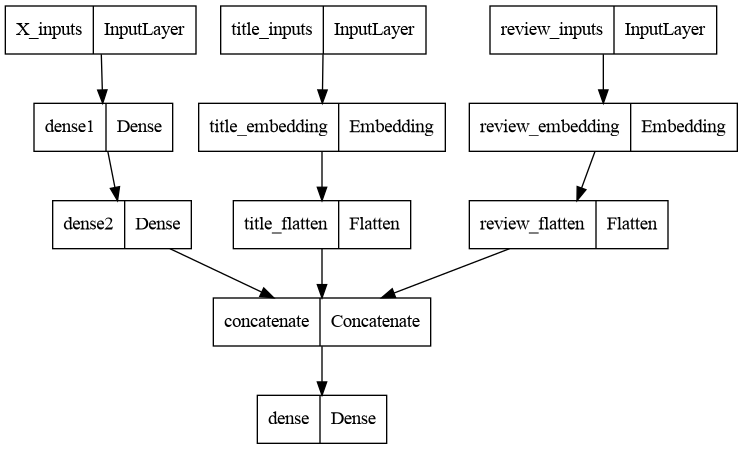

In [38]:
X_inputs = tf.keras.Input(shape=(X_train.shape[1],), name='X_inputs')
dense1 = tf.keras.layers.Dense(64, activation='relu', name='dense1')(X_inputs)
dense2 = tf.keras.layers.Dense(64, activation='relu', name='dense2')(dense1)

title_inputs = tf.keras.Input(shape=(titles_train.shape[1],), name='title_inputs')
title_embedding = tf.keras.layers.Embedding(
    input_dim = 5000,
    output_dim = 64,
    input_length = titles_train.shape[1],
    name='title_embedding'
)(title_inputs)
title_flatten = tf.keras.layers.Flatten(name='title_flatten')(title_embedding)

review_inputs = tf.keras.Input(shape=(reviews_train.shape[1],), name='review_inputs')
review_embedding = tf.keras.layers.Embedding(
    input_dim = 5000,
    output_dim = 64,
    input_length = reviews_train.shape[1],
    name='review_embedding'
)(review_inputs)
review_flatten =tf.keras.layers.Flatten(name='review_flatten')(review_embedding)

concat = tf.keras.layers.concatenate([dense2, title_flatten, review_flatten], name='concatenate')

outputs = tf.keras.layers.Dense(1, activation='linear')(concat)

model = tf.keras.Model(inputs=[X_inputs, title_inputs, review_inputs], outputs=outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

### Training

In [42]:
model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    x=[X_train, titles_train, reviews_train],
    y=y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
524/524 [==============================] - 13s 23ms/step - loss: 0.7932 - val_loss: 0.5779
Epoch 2/100
524/524 [==============================] - 13s 25ms/step - loss: 0.3750 - val_loss: 0.6269
Epoch 3/100
524/524 [==============================] - 14s 28ms/step - loss: 0.1798 - val_loss: 0.6256
Epoch 4/100
524/524 [==============================] - 13s 25ms/step - loss: 0.0891 - val_loss: 0.6341
Epoch 5/100
524/524 [==============================] - 13s 25ms/step - loss: 0.0674 - val_loss: 0.6326
Epoch 6/100
524/524 [==============================] - 13s 24ms/step - loss: 0.0864 - val_loss: 0.6440


### Results

In [43]:
loss = model.evaluate([X_test, titles_test, reviews_test], y_test)
r2 = r2_score(y_test, model.predict([X_test, titles_test, reviews_test]))

281/281 [==============================] - 3s 11ms/step


In [44]:
print("     Test Loss: {:.5f}".format(loss))
print("Test R^2 Score: {:.5f}".format(r2))

     Test Loss: 0.56470
Test R^2 Score: 0.43320
